# Hands-On Time Series Analysis: Autocorrelation and Stationarity (Lab 2)

In **Lecture 3**, we explored the concepts of **autocorrelation** and **autocovariance** functions and discussed the stationarity of basic time series models, including the **Autoregressive (AR)**, **Random Walk (RW)**, and **Moving Average (MA)** processes. In this lab, we'll generate these fundamental time series models, plot their correlograms, and assess their stationarity.

After completing this lab, you will learn:

1. How to simulate **White Noise**, **AR(1)**, and **RW** models.
2. How to visualize the **autocorrelation** and **partial autocorrelation** functions using Python.
3. How to check for **stationarity** in time series data with Python.


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## 1. Simulation of a White Noise Process

A **white noise process** $\epsilon_t$ has the property that $\epsilon_t$ is **independent and identically distributed (i.i.d.)** with a mean of $E(\epsilon_t) = 0$ and a finite variance. A **Gaussian white noise** is a special case where $\epsilon_t$ follows a normal distribution.

Let's simulate a Gaussian white noise with variance $\sigma^2 = 0.02$.




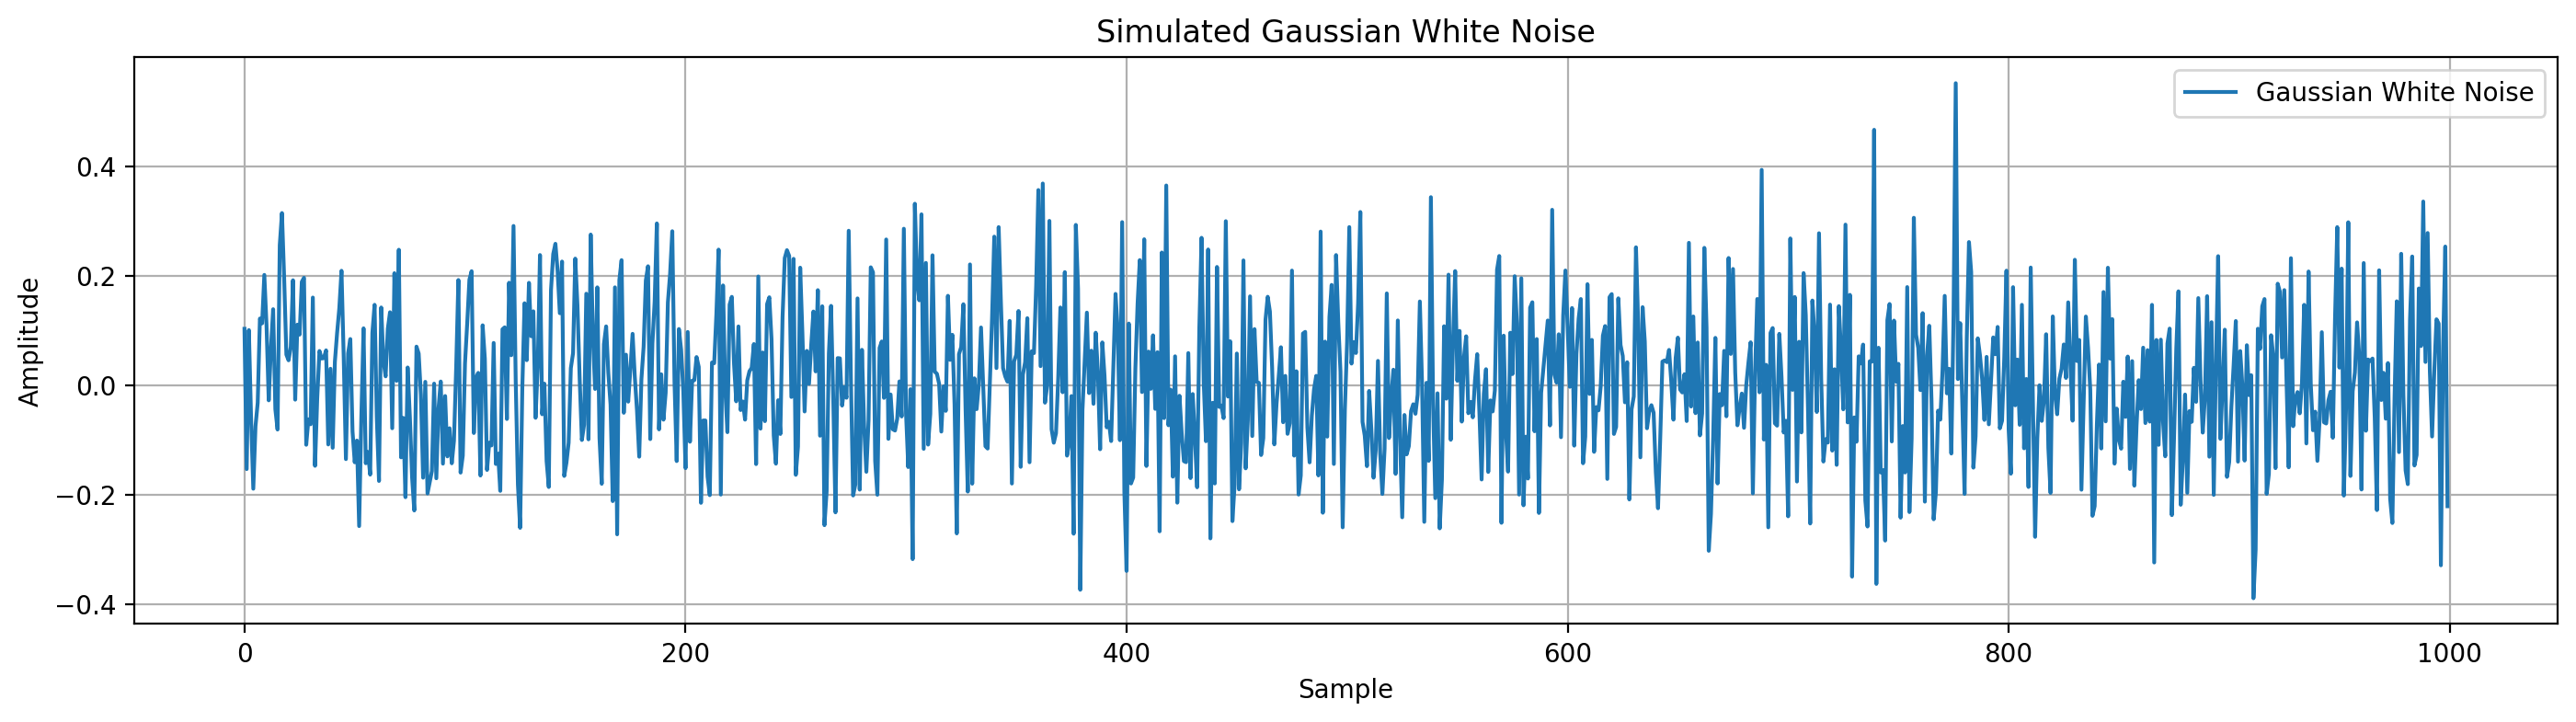

In [67]:
# Parameters for the Gaussian white noise
mean = 0
variance = 0.02
size = 1000  # Number of samples to generate

# Generate Gaussian white noise
white_noise = np.random.normal(mean, np.sqrt(variance), size)

# Plot the generated noise
plt.figure(figsize=(17, 4))
plt.plot(white_noise, label='Gaussian White Noise', color='tab:blue')
plt.title('Simulated Gaussian White Noise')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


Next, we can check the mean and standard deviation of our simulation. As the number of observations increases, we should observe that the mean approaches 0, and the standard deviation approaches $\sqrt{0.02} = 0.141$.


In [68]:
# Calculate mean and standard deviation of the simulated noise
simulated_mean = np.mean(white_noise)
simulated_std = np.std(white_noise)

print("Mean of simulated noise:", simulated_mean)
print("Standard Deviation of simulated noise:", simulated_std)


Mean of simulated noise: 0.005889976722179845
Standard Deviation of simulated noise: 0.13983656431330055


## 2. Simulation of AR(1) and the RW

### 2.1 Simulation of AR(1) process with constant term

We will simulate an **AR(1)** process with a constant term, which has the following expression:  
$$X_t = a + bX_{t-1} + \epsilon_t$$  
where $a$ and $b$ are constants, and $\epsilon_t$ is a white noise process. For this simulation, let $a = 0.01$, $b = 0.95$, and the initial value $X_0 = 0.1$.


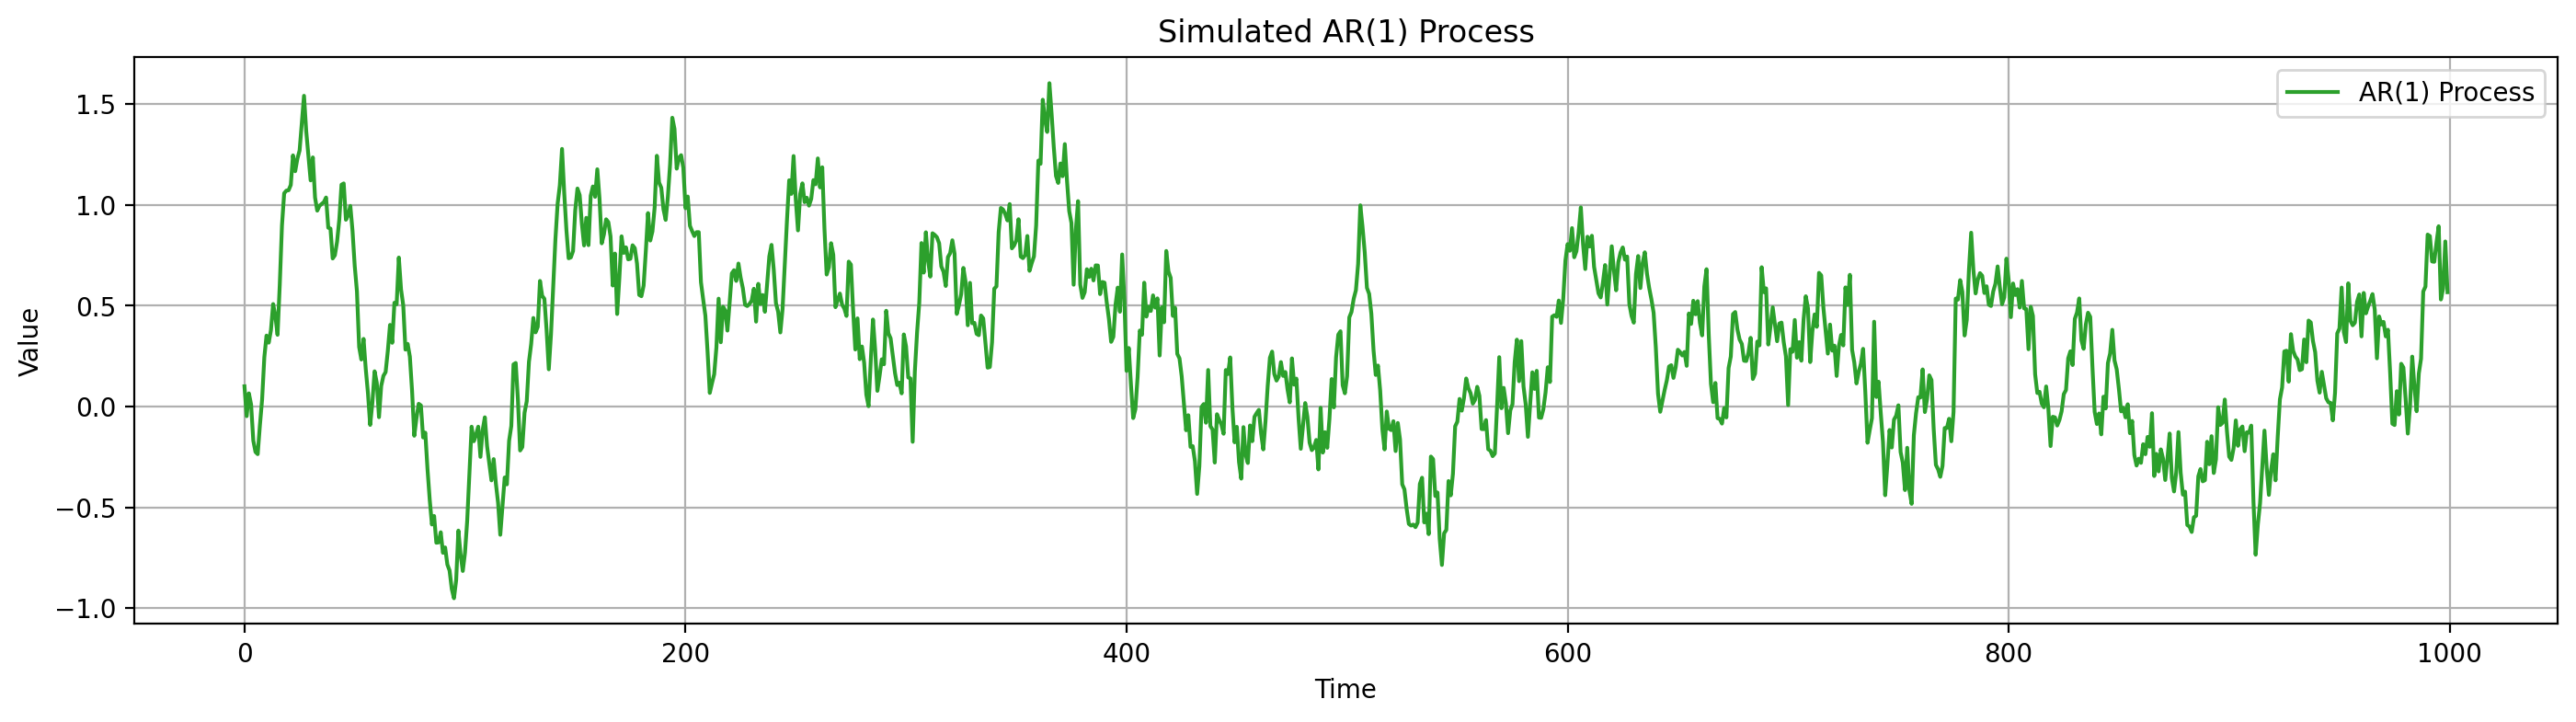

In [69]:
# Parameters for AR(1) process
a = 0.01
b = 0.95
X0 = 0.1  # Initial value
n = len(white_noise)

# Initialize the AR(1) process
AR_1 = np.zeros(n)
AR_1[0] = X0

# Simulate the AR(1) process
for t in range(1, n):
    AR_1[t] = a + b * AR_1[t-1] + white_noise[t]

# Plot the generated AR(1) process
plt.figure(figsize=(17, 4))
plt.plot(AR_1, label='AR(1) Process', color='tab:green')
plt.title('Simulated AR(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Great! Now, let's check the mean and variance of our simulation. Under the assumption of stationarity, the mean and variance of the **AR(1)** process, given by the equation 
$$X_t = a + bX_{t-1} + \epsilon_t,$$ 
can be expressed as follows:

- The mean is 
$$E(X_t) = \frac{a}{1 - b} = 0.2.$$
- The variance is 
$$V(X_t) = \frac{\sigma^2}{1 - b^2} = 0.2.$$

Therefore, as we increase the number of observations, the mean and variance of the simulated process should converge to these theoretical values.


In [70]:
# Calculate mean and standard deviation of the simulated AR(1)
simulated_mean = np.mean(AR_1)
simulated_std = np.std(AR_1)

print("Mean of simulated AR(1):", simulated_mean)
print("Standard Deviation of simulated AR(1):", simulated_std)


Mean of simulated AR(1): 0.3067679640068468
Standard Deviation of simulated AR(1): 0.45851070301299424


### 2.2 Simulation of AR(1) process without constant term


Now, suppose that $a = 0$. Our **AR(1)** process then has the following expression:
$$X_t = bX_{t-1} + \epsilon_t.$$

In this case, the mean and variance of the process are:
- The mean is $E(X_t) = 0$.
- The variance is 
$$V(X_t) = \frac{\sigma^2}{1 - b^2} = 0.2.$$

Let's simulate the **AR(1)** process without the constant term.


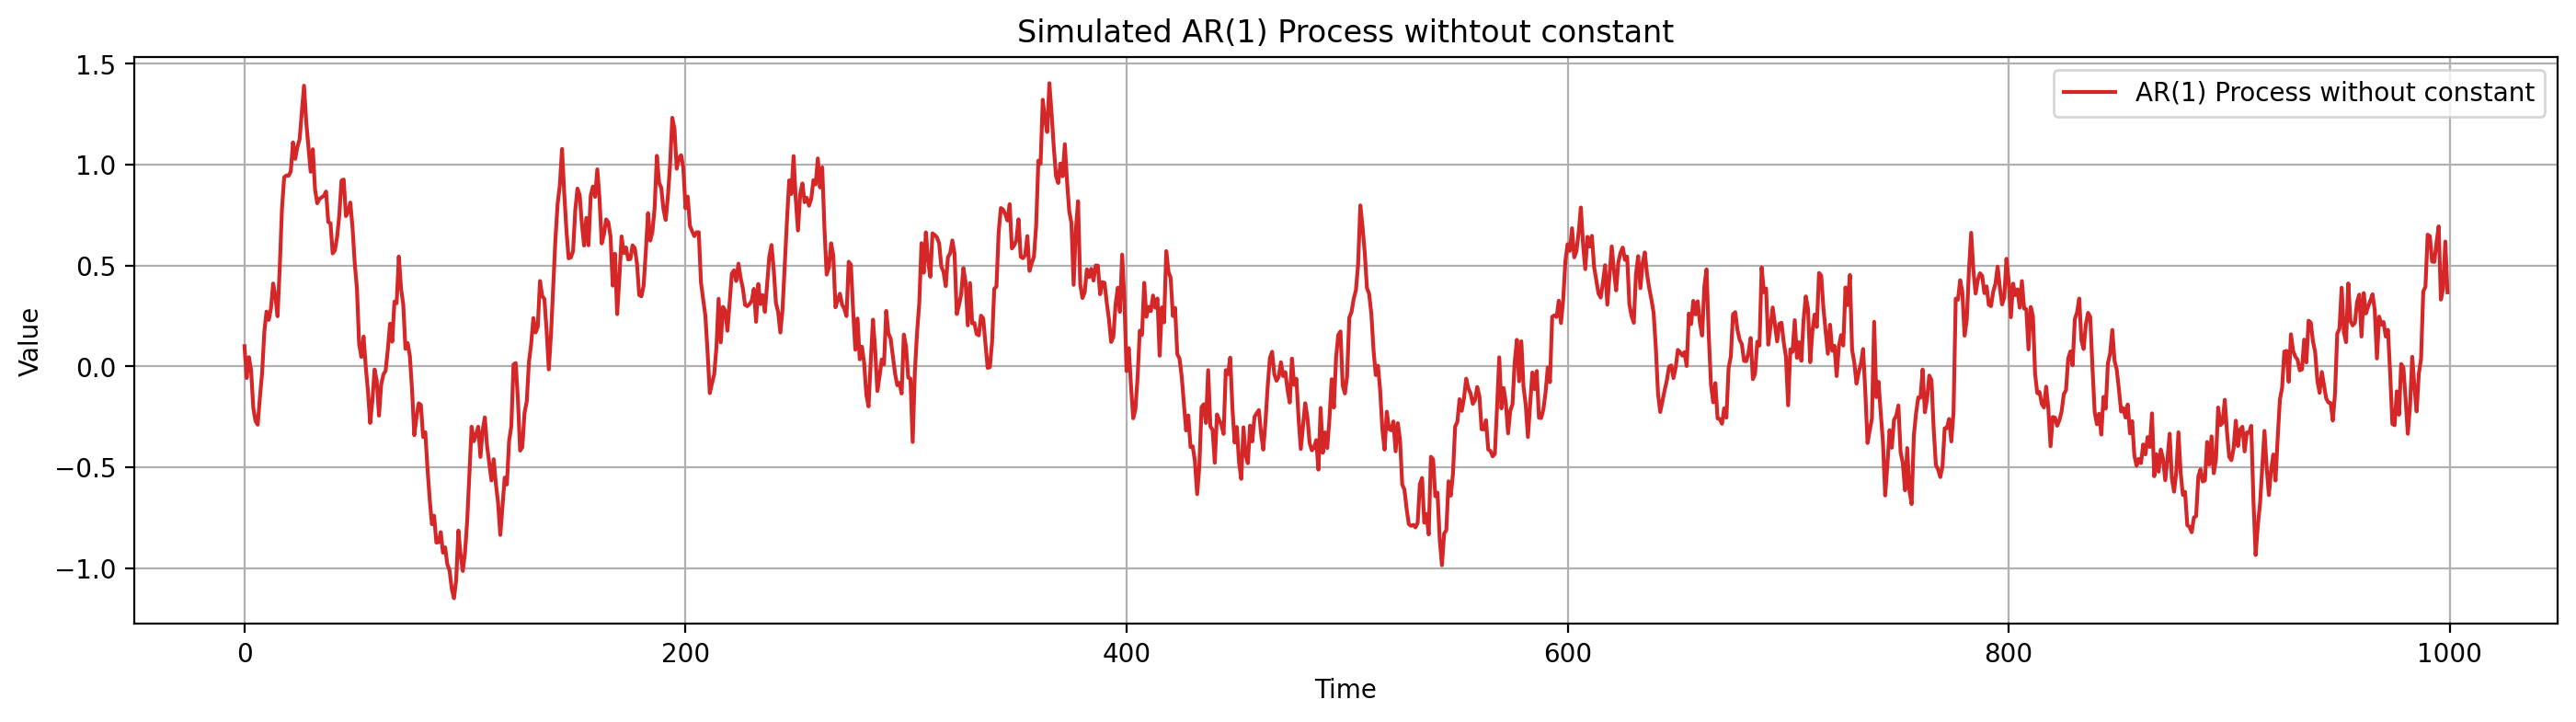

In [71]:
# Parameters for AR(1) process
a = 0
b = 0.95
X0 = 0.1  # Initial value
n = len(white_noise)

# Initialize the AR(1) process
AR_1 = np.zeros(n)
AR_1[0] = X0

# Simulate the AR(1) process
for t in range(1, n):
    AR_1[t] = a + b * AR_1[t-1] + white_noise[t]

# Plot the generated AR(1) process
plt.figure(figsize=(17, 4))
plt.plot(AR_1, label='AR(1) Process without constant', color='tab:red')
plt.title('Simulated AR(1) Process withtout constant')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Let's check the convergence of the mean and variance. 

As the number of observations increases, we expect the empirical mean and variance of the simulated process to approach their theoretical values.


In [72]:
# Calculate mean and standard deviation of the simulated AR(1) without constant term
simulated_mean = np.mean(AR_1)
simulated_std = np.std(AR_1)

print("Mean of simulated AR(1):", simulated_mean)
print("Standard Deviation of simulated AR(1):", simulated_std)


Mean of simulated AR(1): 0.11076796400684688
Standard Deviation of simulated AR(1): 0.4601679593163124


### 2.3 Simulation of Random Walk (RW)

Now, we will simulate a **random walk (RW)** model. The expression of the RW is as follows:
$$X_t = X_{t-1} + \epsilon_t.$$

A process of this type implies that the best prediction of $X_{t+1}$ (the value in the next period) is simply the current value of $X_t$. This is equivalent to setting $b = 1$ in the previous **AR(1)** model. 

We can generate the RW using the same parameters for the white noise.


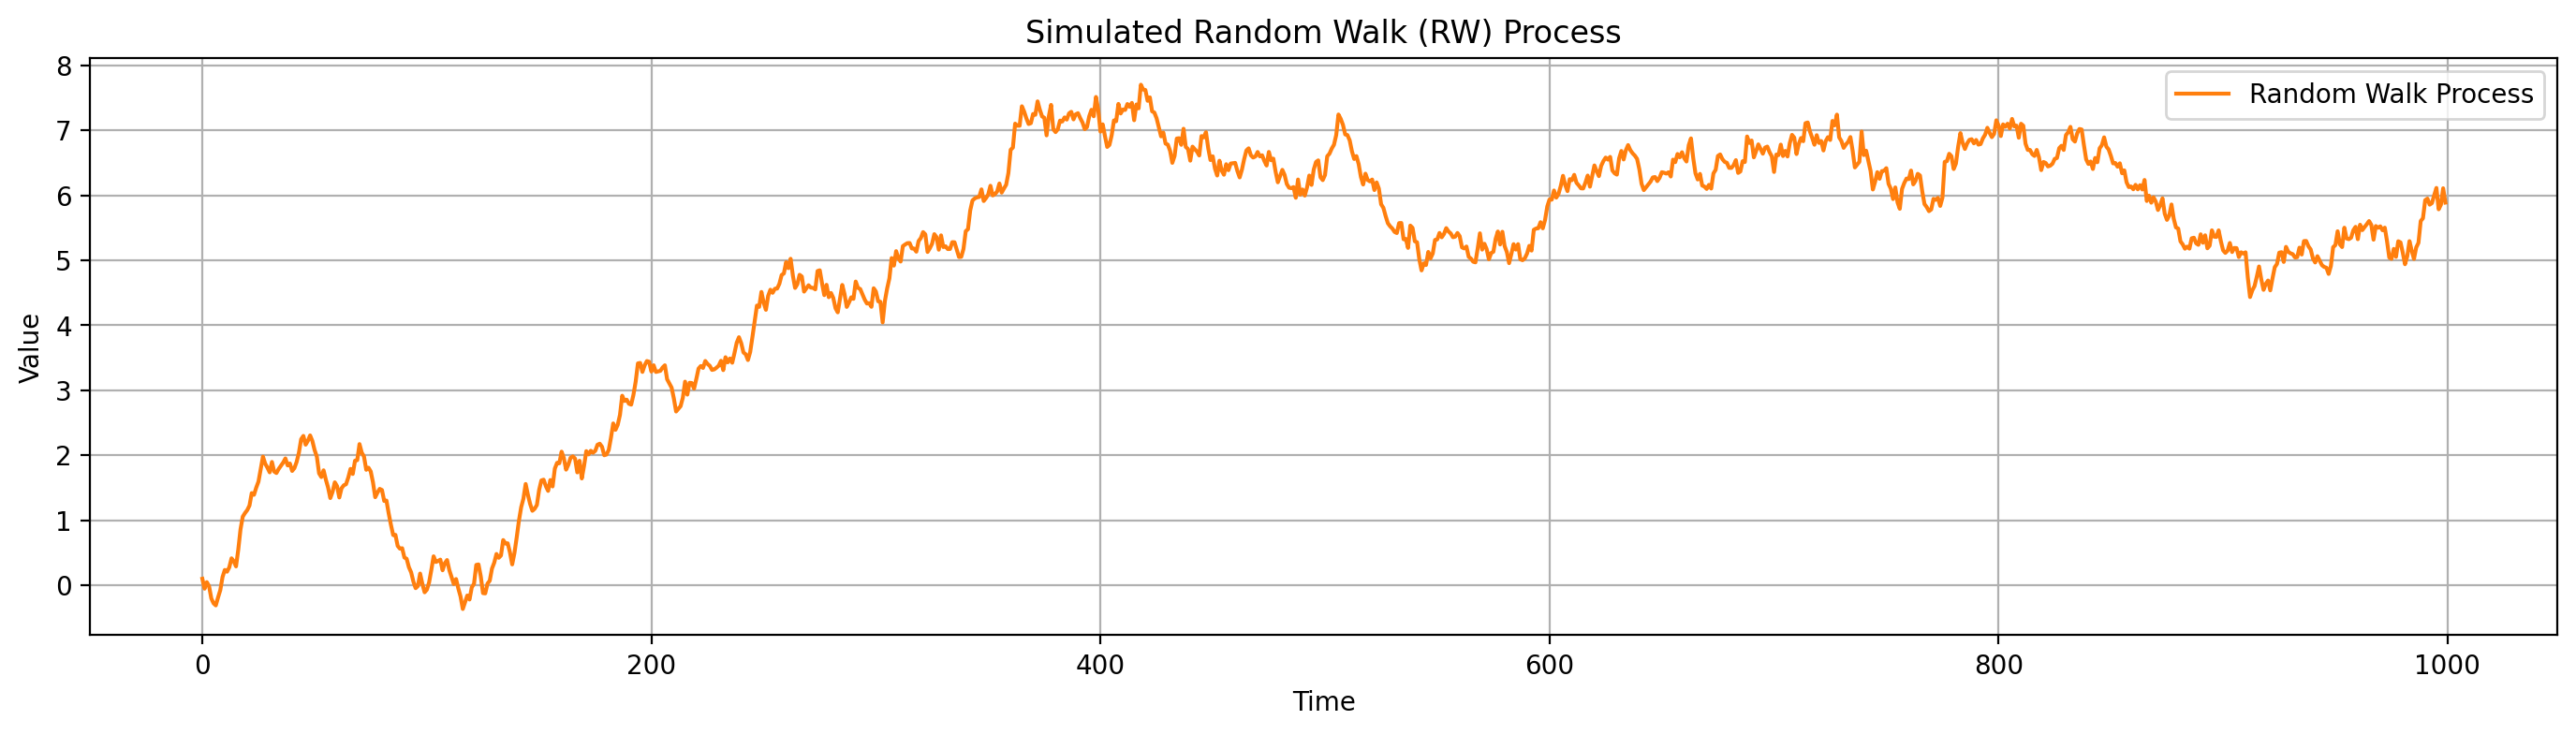

In [73]:
# Parameters for the Random Walk (RW) model
b = 1.0  # Coefficient for the RW model, equivalent to setting b = 1
X0 = 0.1  # Initial value
n = len(white_noise)  # Number of samples to generate

# Initialize the RW process
RW = np.zeros(n)
RW[0] = X0

# Simulate the RW process
for t in range(1, n):
    RW[t] = b * RW[t-1] + white_noise[t]

# Plot the generated RW process
plt.figure(figsize=(17, 4))
plt.plot(RW, label='Random Walk Process', color='tab:orange')
plt.title('Simulated Random Walk (RW) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## 3.  Visualization of the Correlogram

To analyze time series data and visualize their patterns, Python offers several packages. One of the most useful is **[statsmodels](https://www.statsmodels.org/stable/graphics.html#time-series-plots)**, which provides tools to create time series-specific plots. Two important functions in this package are:

- **[plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf)**: Creates a plot of the **Autocorrelation Function (ACF)**, showing the correlation of a time series with its lagged values.
- **[plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html#statsmodels.graphics.tsaplots.plot_pacf)**: Generates a plot of the **Partial Autocorrelation Function (PACF)**, which highlights the direct correlation between observations at different lags, removing the effect of any intermediate correlations.

#### What Are ACF and PACF?

- **Autocorrelation (ACF)**: This measures how current values in a time series are related to its past values over various lags (time steps). In other words, it shows the correlation between the series and its previous observations at different time intervals.

- **Partial Autocorrelation (PACF)**: This measures the direct correlation between a value and its lagged values while removing any indirect correlations through intermediate lags. Unlike ACF, PACF isolates only the immediate relationship between an observation and its lagged observations.

The main difference between ACF and PACF is that **ACF** considers all correlations, including indirect ones, while **PACF** focuses on the direct correlations only. This makes PACF useful for identifying the actual lagged dependencies in the data.

Next, we will plot the ACF and PACF for the **White Noise**, **AR(1)**, and **Random Walk (RW)** processes generated earlier.


### 3.1. Plot ACF and PACF for White Noise

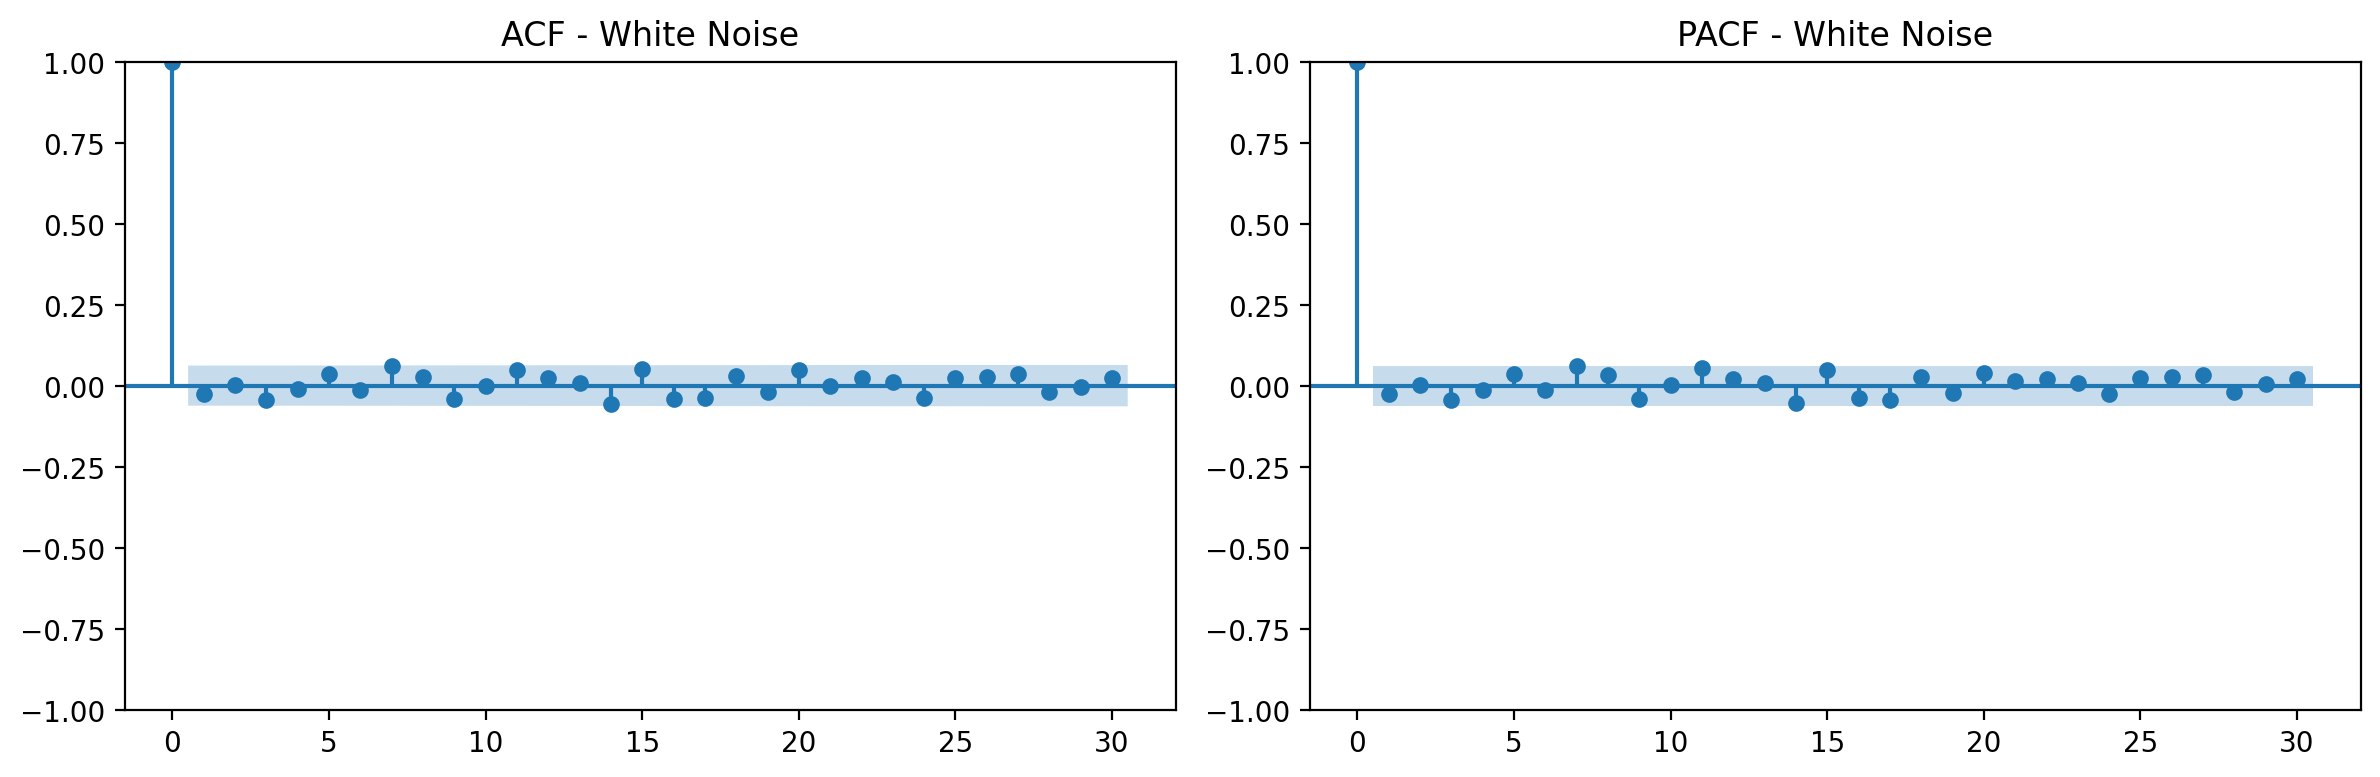

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for white noise side by side
plt.figure(figsize=(12, 4))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(white_noise, lags=30, ax=plt.gca(), title="ACF - White Noise")

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(white_noise, lags=30, ax=plt.gca(), title="PACF - White Noise")

plt.tight_layout()
plt.show()


We observe that for the **White Noise** process, all autocorrelations are within the blue bands (non-significant), except at **lag = 0**. This confirms the property of white noise being uncorrelated over time.

### 3.2. Plot ACF and PACF for AR(1)

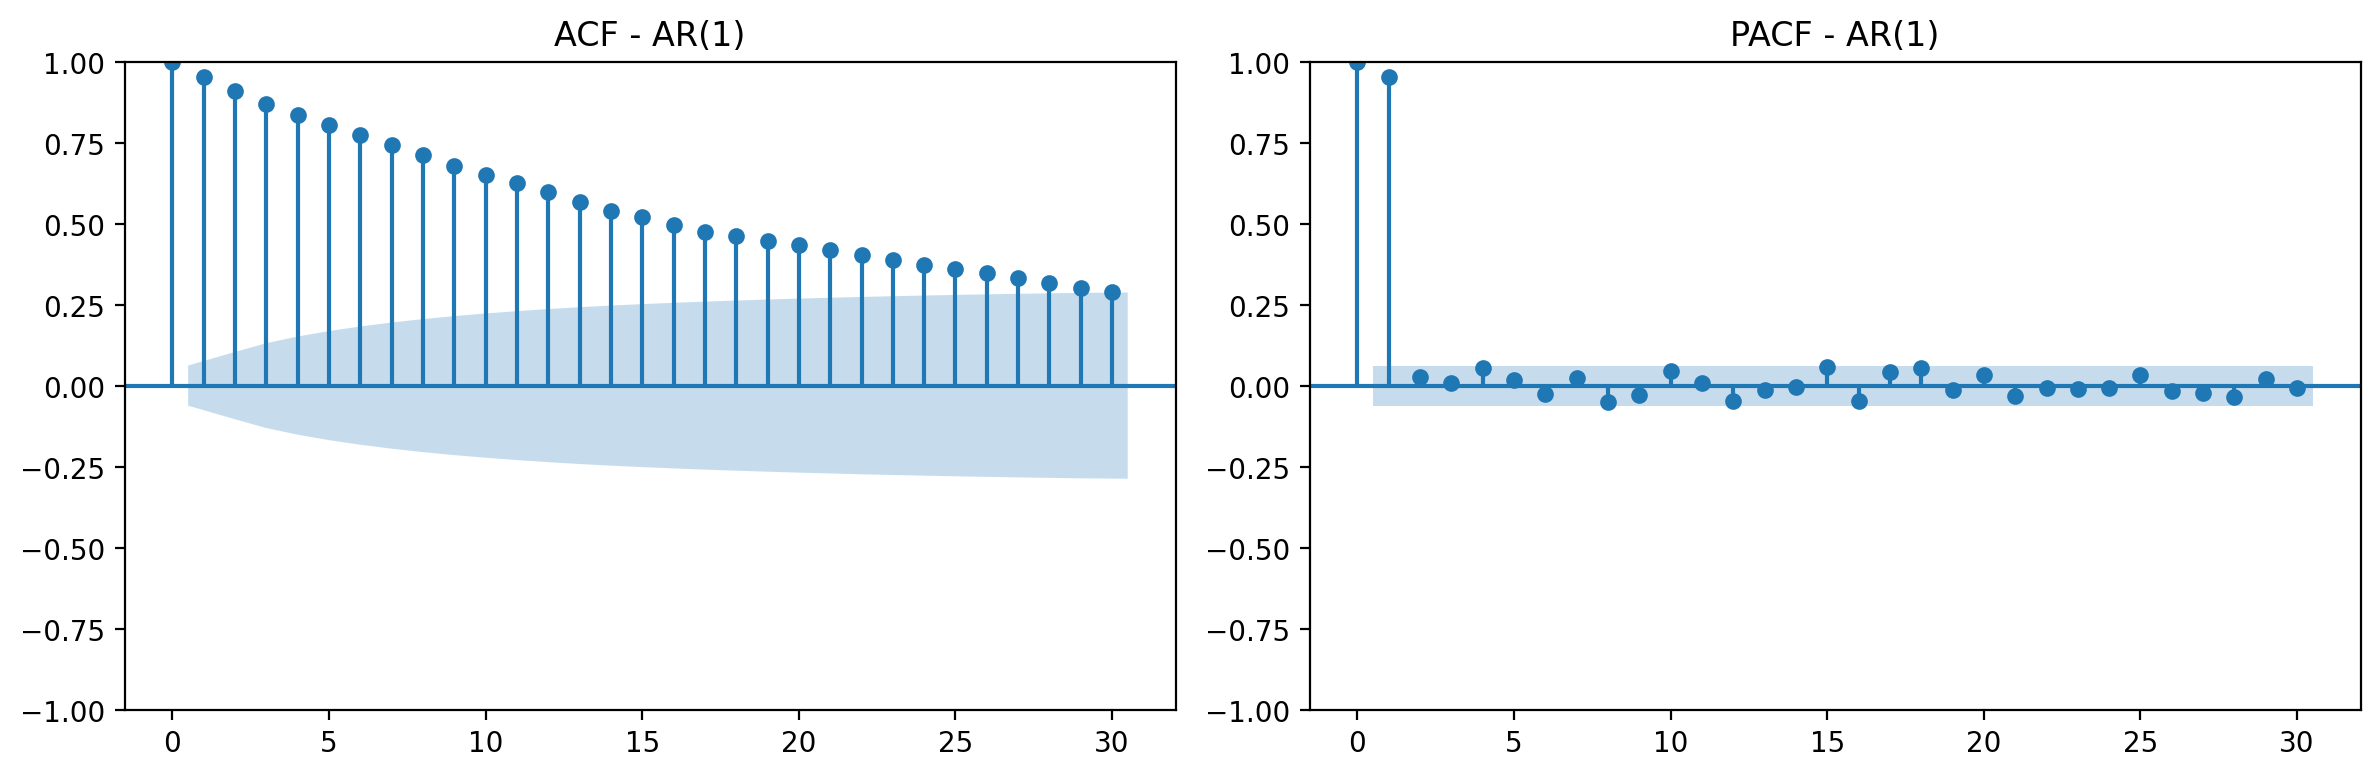

In [75]:
# Plot ACF and PACF for AR(1) side by side
plt.figure(figsize=(12, 4))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(AR_1, lags=30, ax=plt.gca(), title="ACF - AR(1)")

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(AR_1, lags=30, ax=plt.gca(), title="PACF - AR(1)")

plt.tight_layout()
plt.show()


In the **AR(1)** process, the ACF slowly decreases to zero as lags increase, while the PACF drops sharply after lag 1. This makes ACF and PACF helpful tools for detecting the order of an AR process.



### 3.3. Plot ACF and PACF for RW

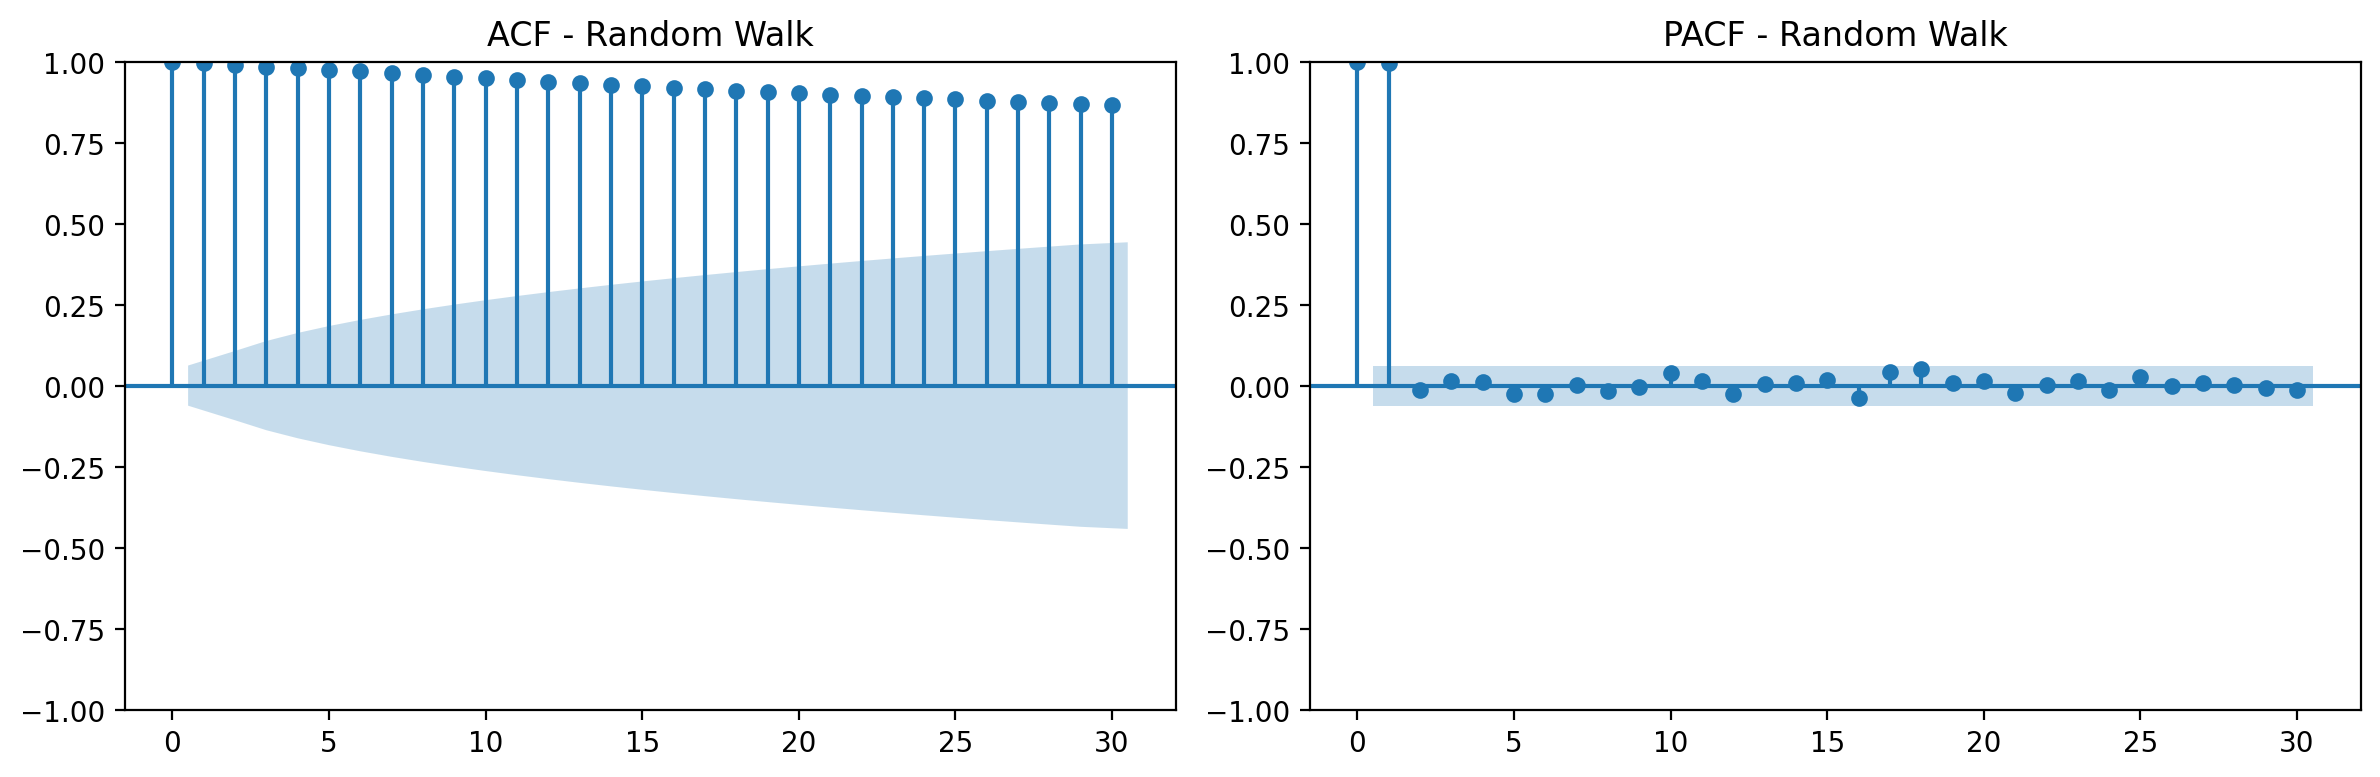

In [76]:
# Plot ACF and PACF for RW side by side
plt.figure(figsize=(12, 4))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(RW, lags=30, ax=plt.gca(), title="ACF - Random Walk")

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(RW, lags=30, ax=plt.gca(), title="PACF - Random Walk")

plt.tight_layout()
plt.show()


For the **RW** process, the ACF decreases much more slowly compared to AR processes, while the PACF drops after lag 1. The slower decrease in the ACF is a sign that the process is not stationary.



## 4. Stationarity

In time series analysis, it's important to know if a series is **stationary**, meaning its mean and variance stay constant over time. However, many real-world time series are not stationary, so testing for this is crucial. In this section, we'll explore three techniques to check for stationarity:

1. **Run-sequence plots**
2. **Summary statistics**
3. **Augmented Dickey-Fuller (ADF) test**

We'll apply these techniques to the **White Noise** and **Random Walk (RW)** processes we generated earlier.


### 4.1. Run-Sequence Plots

Run-sequence plots are a simple and effective way to visualize your data over time. This is usually the first step in understanding how your time series behaves. Let's revisit the plots of the **White Noise** and **Random Walk** processes.


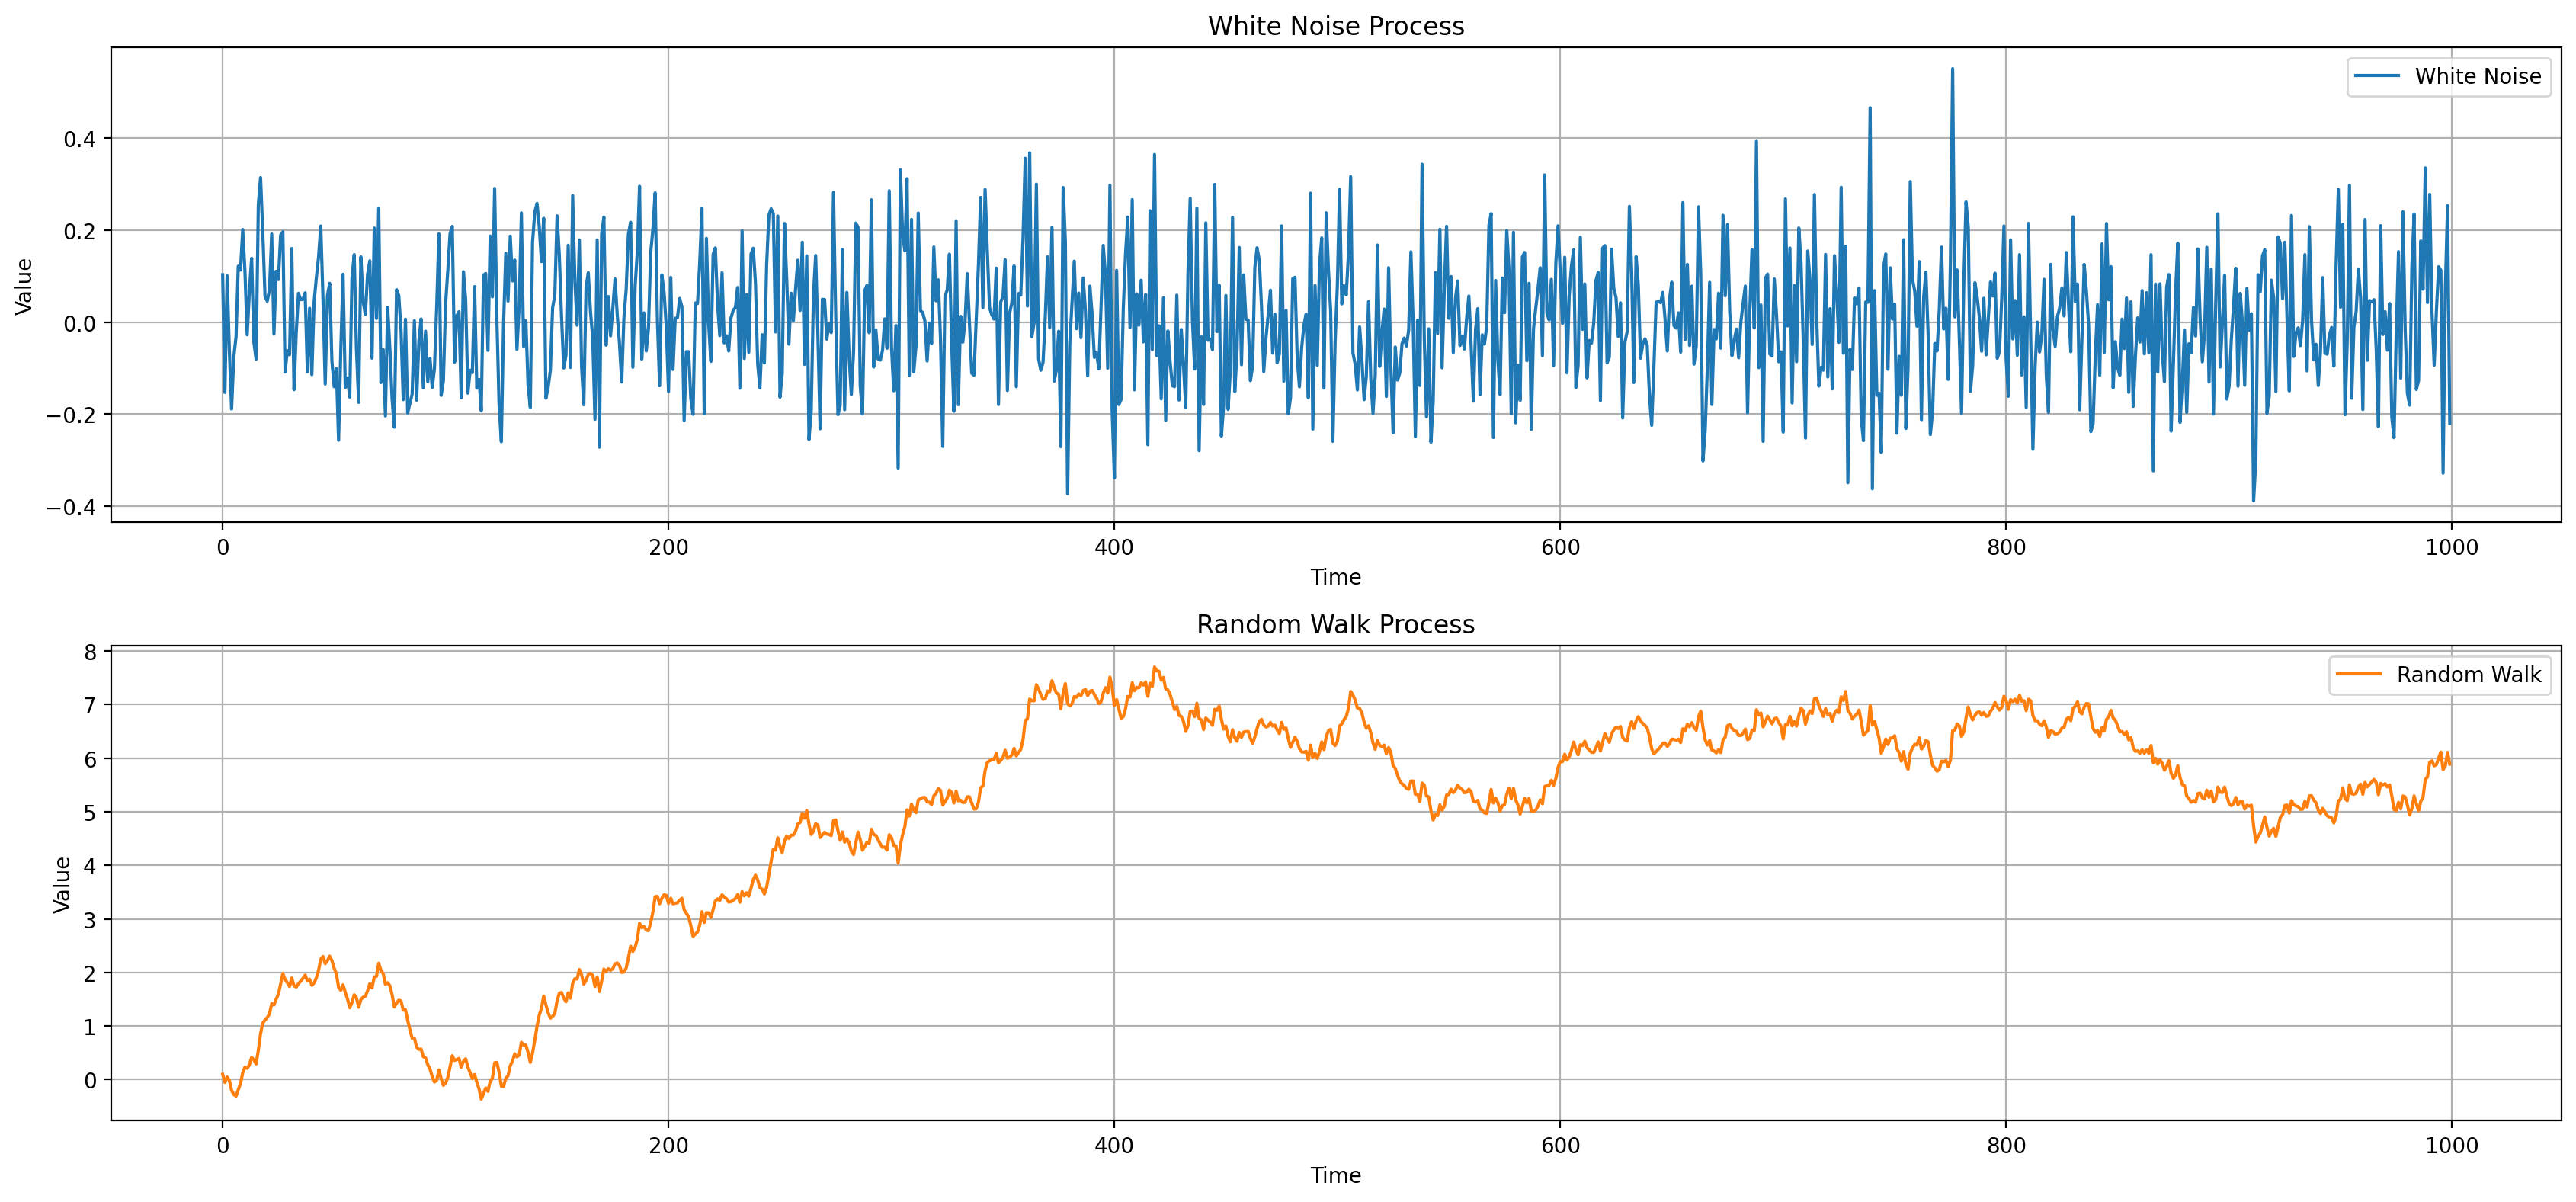

In [77]:
# Plot white noise and RW vertically
plt.figure(figsize=(17, 8))

# Plot White Noise
plt.subplot(2, 1, 1)
plt.plot(white_noise, label='White Noise')
plt.title('White Noise Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot Random Walk
plt.subplot(2, 1, 2)
plt.plot(RW, label='Random Walk', color='tab:orange')
plt.title('Random Walk Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Observation.** The white noise process shows random fluctuations around a stable mean with no trend, while the random walk drifts without a constant mean or stable variance.

### 4.2. Summary Statistics

An easy way to check for a constant mean and variance is to split the data into chunks, calculate the statistics for each chunk, and compare them. While this method isn’t very precise, it gives a quick sense of whether your data is approximately stationary.


In [78]:
# Split the white noise data into 10 chunks and calculate mean and variance in each chunk

num_chunks = 10
chunk_size = len(white_noise) // num_chunks

# Calculate mean and variance for each chunk
chunk_means = [np.mean(white_noise[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]
chunk_vars = [np.var(white_noise[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]

print("Chunk Means in White Noise:", chunk_means)
print("Chunk Variances in White Noise:", chunk_vars)


Chunk Means in White Noise: [np.float64(-0.0010524037116919828), np.float64(0.03547255719546934), np.float64(0.011304611067440583), np.float64(0.02748680828932735), np.float64(-0.010849796981643161), np.float64(-0.004051575570657711), np.float64(0.00769957748743497), np.float64(0.005558707055537584), np.float64(-0.01860744543772849), np.float64(0.0059387278283099644)]
Chunk Variances in White Noise: [np.float64(0.016286390789621588), np.float64(0.019080666860857617), np.float64(0.017682020786530035), np.float64(0.02183129643814081), np.float64(0.02199923632230541), np.float64(0.018783094123449452), np.float64(0.01468524404438368), np.float64(0.02621810206814607), np.float64(0.014742490215214163), np.float64(0.02183247347913049)]


In [79]:
# Split the RW data into 10 chunks and calculate mean and variance in each chunk

num_chunks = 10
chunk_size = len(RW) // num_chunks

# Calculate mean and variance for each chunk
chunk_means = [np.mean(RW[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]
chunk_vars = [np.var(RW[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]

print("Chunk Means in RW:", chunk_means)
print("Chunk Variances in RW:", chunk_vars)


Chunk Means in RW: [np.float64(1.208090039853012), np.float64(1.326060926226337), np.float64(3.9687148103375502), np.float64(6.089052359060506), np.float64(6.70598153510468), np.float64(5.614732305798429), np.float64(6.4101094054835), np.float64(6.565599191799131), np.float64(6.266817244912377), np.float64(5.217847826760213)]
Chunk Variances in RW: [np.float64(0.5851571803064997), np.float64(1.147423431129699), np.float64(0.42737753814752816), np.float64(0.9489348615896129), np.float64(0.17284892221052087), np.float64(0.37386266701774107), np.float64(0.053189648484683126), np.float64(0.14027334951917012), np.float64(0.3771041941862435), np.float64(0.12522243810199768)]


**Observation.** While the mean and variance of the **White Noise** remain relatively constant over time, the mean and variance of the **Random Walk (RW)** change significantly, indicating that the RW is not stationary.


### 4.3. Augmented Dickey-Fuller (ADF) Test

The Augmented Dickey-Fuller (ADF) test is a statistical method used to determine whether a time series is stationary. Here’s what to remember:

1. **Null hypothesis**: The series is **non-stationary**.
2. **Alternative hypothesis**: The series is **stationary**.

Before running the test, you need to set a significance level (typically **0.05**) to decide whether to reject the null hypothesis. However, this value can vary based on different factors.

Let's demonstrate how to use this test in Python and apply it to our **White Noise** and **Random Walk** time series.



In [80]:
from statsmodels.tsa.stattools import adfuller

# Apply the Augmented Dickey-Fuller (ADF) test to the White Noise series
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(white_noise)

# Print the p-value
print(f"p-value for white noise: {pvalue}")


p-value for white noise: 0.0


In [81]:
# Apply the Augmented Dickey-Fuller (ADF) test to the RW series
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(RW)

# Print the p-value
print(f"p-value for RW: {pvalue}")


p-value for RW: 0.18001358751641228


**Observation.** For the White Noise, the **p-value** of the ADF test is 0. The null hypothesis is rejected, indicating that the series is stationary. In contrast, for the Random Walk (RW), the **p-value** is greater than the 5% significance level. This means we cannot reject the null hypothesis, confirming that the RW is a non-stationary time series. The ADF test provides a clear indication of non-stationarity for Random Walks due to their inherent characteristics (unit root).

The ADF test results for other time series may require further interpretation. Non-stationarity could arise from various factors, so additional tests may be necessary to confirm the non-stationarity nature of the time series.


## 5. Exercise

In this exercise, you will:

- Load the datasets **`SNS_1.csv`** and **`SNS_2.csv`** using Pandas.
- Merge the two datasets into a single DataFrame with a shared time index.
- Plot each time series.
- Check the stationarity of each time series and summarize your findings.


In [82]:
# Load the datasets **`SNS_1.csv`** and **`SNS_2.csv`** using Pandas.
sns_1 = pd.read_csv('SNS_1.csv')
sns_2 = pd.read_csv('SNS_2.csv')
# Display the first few rows of each dataset
print("SNS 1 Data:")
print(sns_1.head())
print("\nSNS 2 Data:")
print(sns_2.head())
# Rename columns for clarity if necessary
sns_1.columns = ['Value_1']
sns_2.columns = ['Value_2']

SNS 1 Data:
          0
0  0.471435
1 -1.190976
2  1.432707
3 -0.312652
4 -0.720589

SNS 2 Data:
          0
0 -1.234296
1  2.312661
2  3.472051
3  4.653733
4  3.008211


In [83]:
# Merge the two datasets into a single DataFrame with a shared time index. create the time index (there is no time column in the csv files)
sns_1['Time'] = pd.date_range(start='2020-01-01', periods=len(sns_1), freq='D')
sns_2['Time'] = pd.date_range(start='2020-01-01', periods=len(sns_2), freq='D')
sns_1.set_index('Time', inplace=True)
sns_2.set_index('Time', inplace=True)
merged_sns = pd.merge(sns_1, sns_2, left_index=True, right_index=True, suffixes=('_1', '_2'))

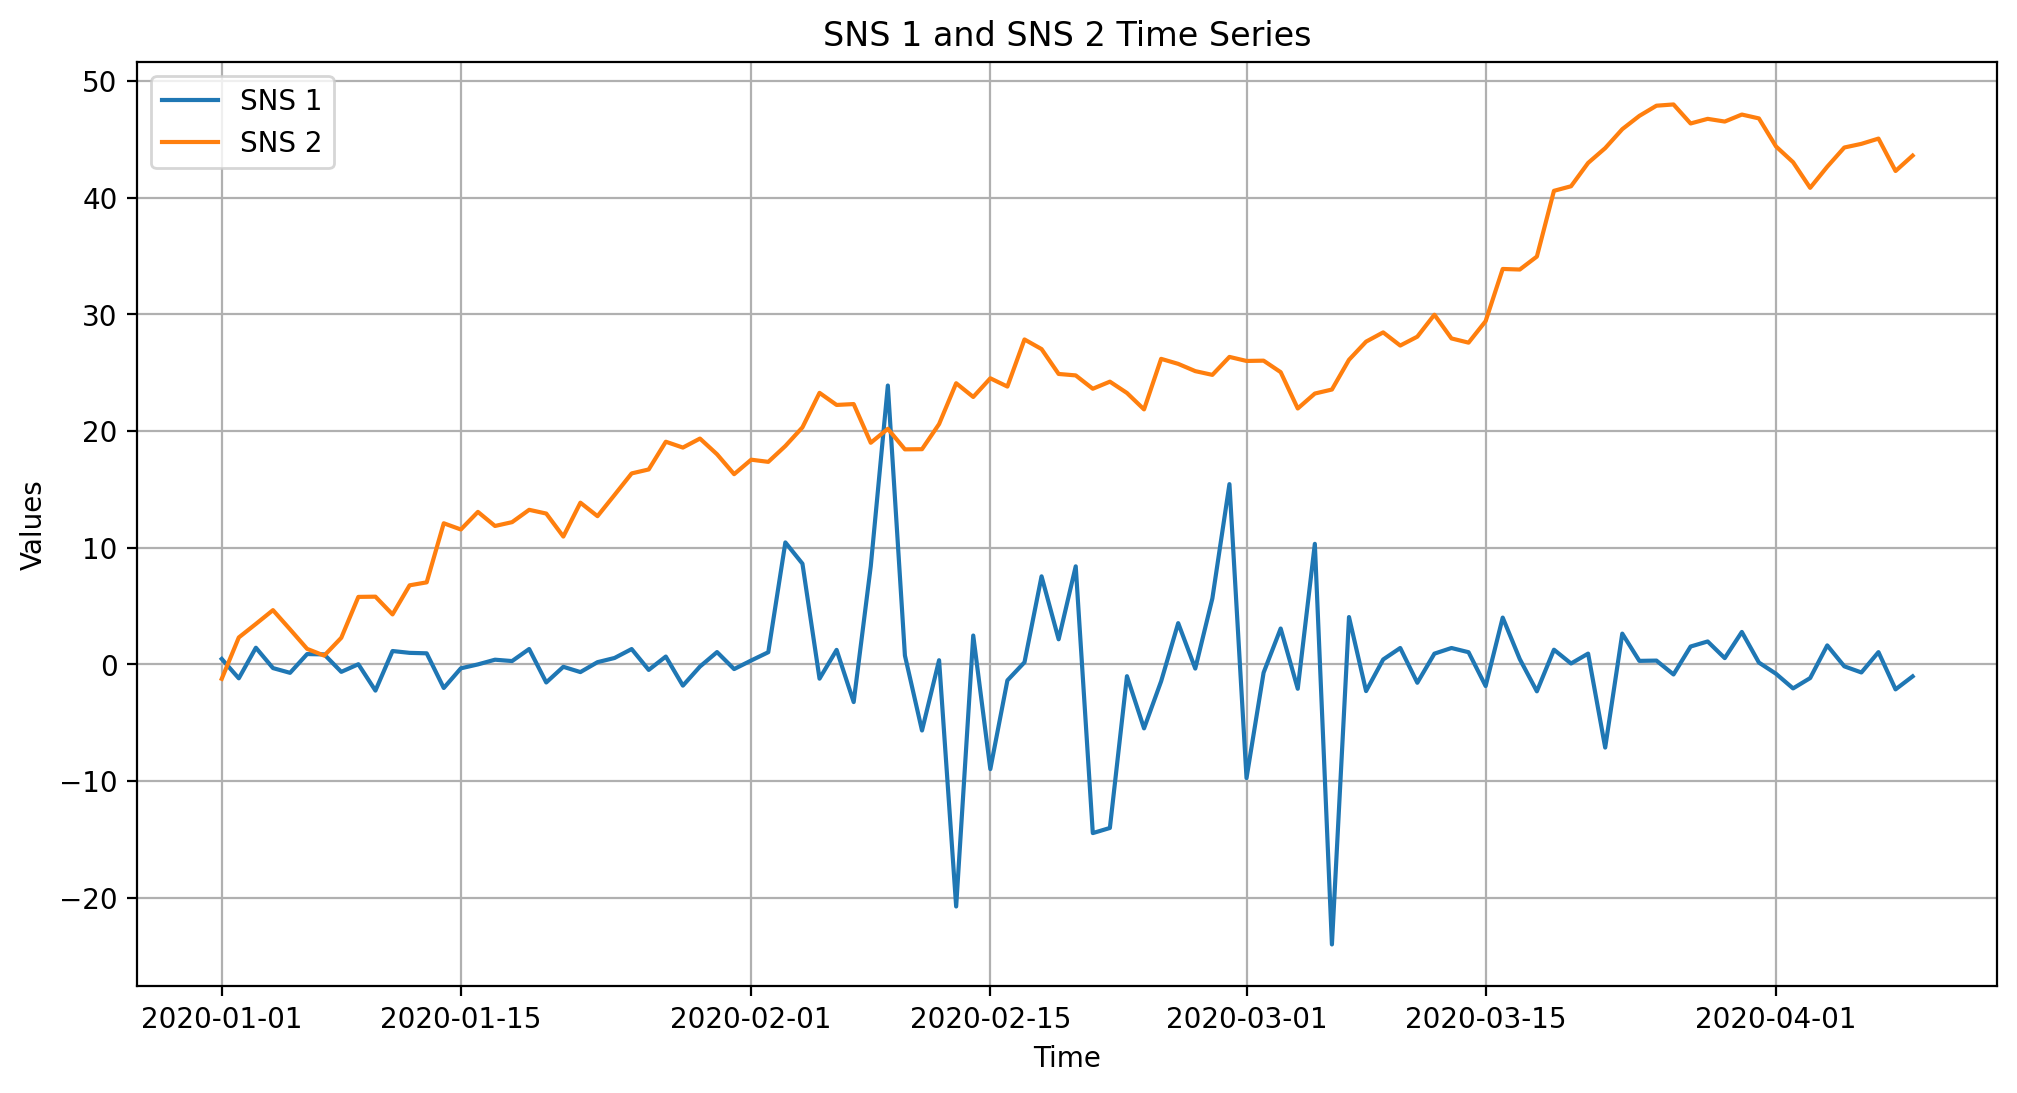

In [84]:
# Plot each time series.
plt.figure(figsize=(12, 6))
plt.plot(merged_sns.index, merged_sns['Value_1'], label='SNS 1', color='tab:blue')
plt.plot(merged_sns.index, merged_sns['Value_2'], label='SNS 2', color='tab:orange')
plt.title('SNS 1 and SNS 2 Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

Chunk Means in SNS 1: [np.float64(-0.14368349244677692), np.float64(0.12108900453057167), np.float64(0.04714783940575571), np.float64(4.920834948914594), np.float64(-2.326269669869378), np.float64(-0.3706503035096624), np.float64(-1.9508487514358908), np.float64(0.34634898422500976), np.float64(0.3048312608184663), np.float64(-0.5190784248947218)]
Chunk Variances in SNS 1: [np.float64(1.1064868022282617), np.float64(1.1652166102943746), np.float64(0.7663515294613723), np.float64(59.919930229457165), np.float64(55.94682032388903), np.float64(79.16835099538157), np.float64(77.81561225605884), np.float64(3.1883945078377307), np.float64(7.293029550416108), np.float64(1.346946005362994)]
Chunk Means in SNS 2: [np.float64(2.81861549883447), np.float64(10.51083038061645), np.float64(16.022528136590555), np.float64(19.73251897758751), np.float64(23.267752719516533), np.float64(24.607903712976068), np.float64(25.543235271427584), np.float64(32.735778111251435), np.float64(46.28942897967977), np

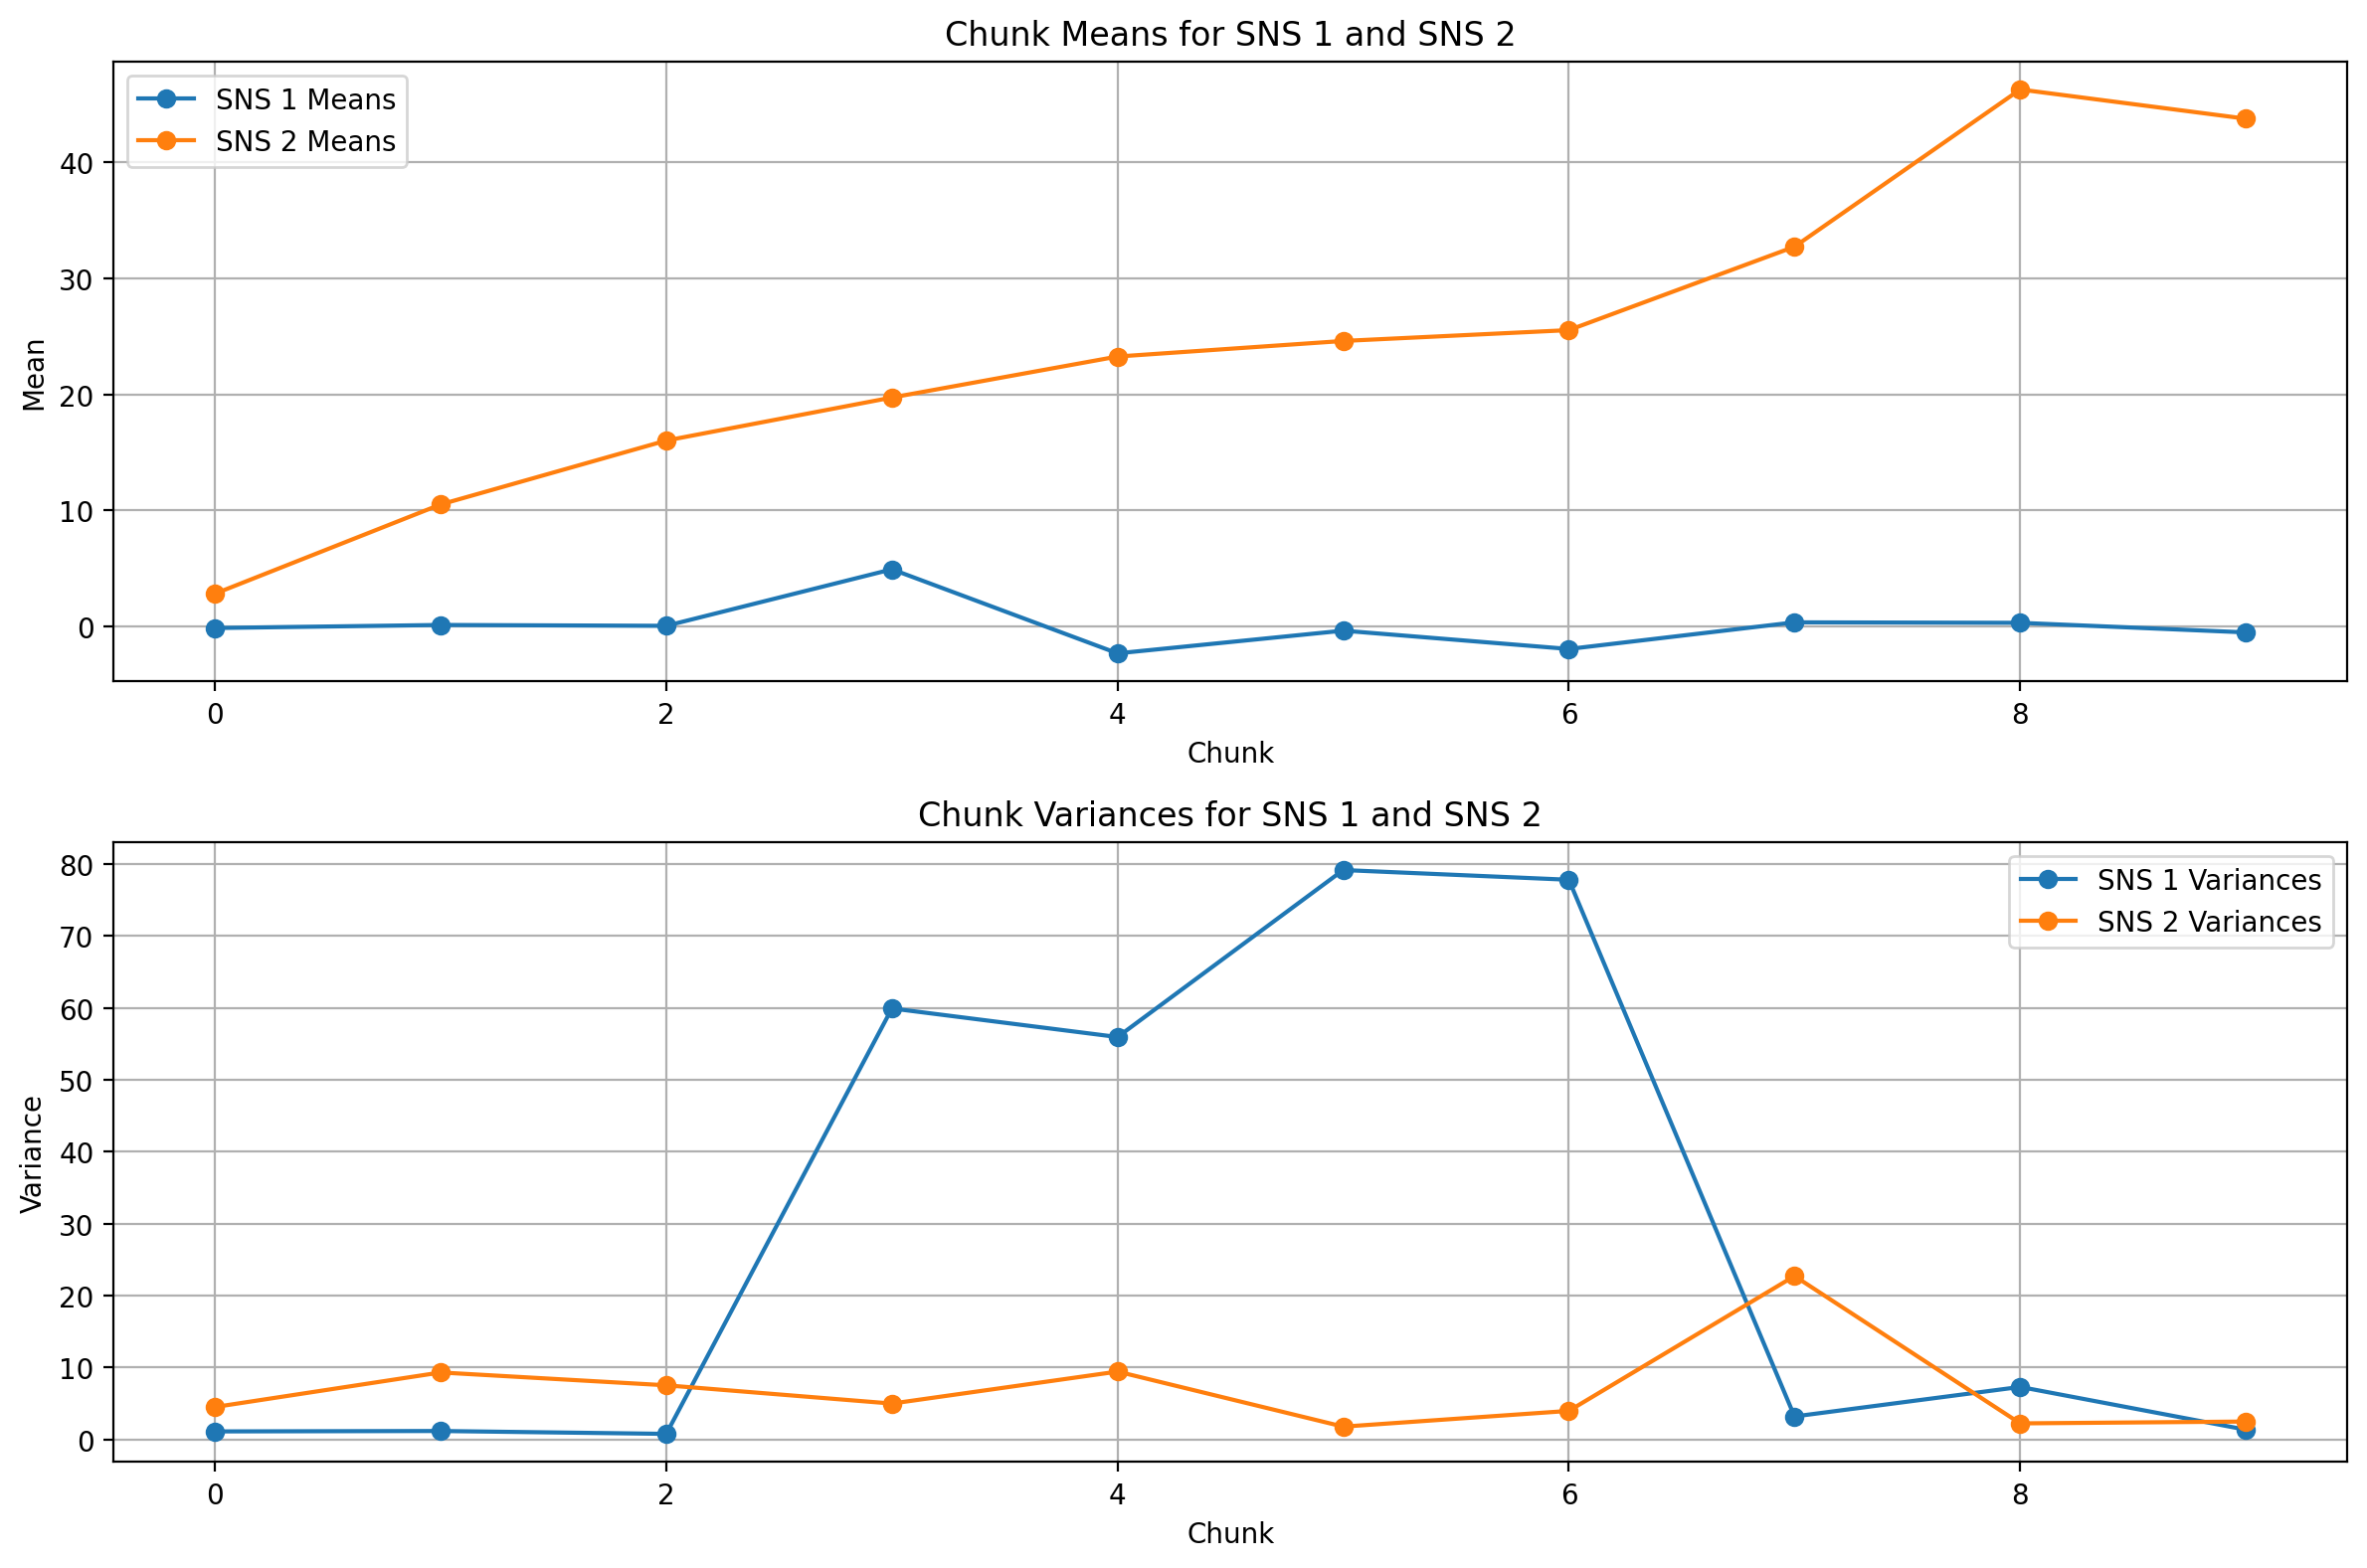

In [85]:
# Check stationarity with Summary Statistics in 10 chunks
num_chunks = 10
chunk_size_1 = len(merged_sns['Value_1']) // num_chunks
chunk_size_2 = len(merged_sns['Value_2']) // num_chunks
# Calculate mean and variance for each chunk in SNS 1
chunk_means_1 = [np.mean(merged_sns['Value_1'][i*chunk_size_1:(i+1)*chunk_size_1]) for i in range(num_chunks)]
chunk_vars_1 = [np.var(merged_sns['Value_1'][i*chunk_size_1:(i+1)*chunk_size_1]) for i in range(num_chunks)]
# Calculate mean and variance for each chunk in SNS 2
chunk_means_2 = [np.mean(merged_sns['Value_2'][i*chunk_size_2:(i+1)*chunk_size_2]) for i in range(num_chunks)]
chunk_vars_2 = [np.var(merged_sns['Value_2'][i*chunk_size_2:(i+1)*chunk_size_2]) for i in range(num_chunks)]
print("Chunk Means in SNS 1:", chunk_means_1)
print("Chunk Variances in SNS 1:", chunk_vars_1)
print("Chunk Means in SNS 2:", chunk_means_2)
print("Chunk Variances in SNS 2:", chunk_vars_2)
# Plot these chunk statistics on the same graph
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(range(num_chunks), chunk_means_1, marker='o', label='SNS 1 Means', color='tab:blue')
plt.plot(range(num_chunks), chunk_means_2, marker='o', label='SNS 2 Means', color='tab:orange')
plt.title('Chunk Means for SNS 1 and SNS 2')
plt.xlabel('Chunk')
plt.ylabel('Mean')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(range(num_chunks), chunk_vars_1, marker='o', label='SNS 1 Variances', color='tab:blue')
plt.plot(range(num_chunks), chunk_vars_2, marker='o', label='SNS 2 Variances', color='tab:orange')
plt.title('Chunk Variances for SNS 1 and SNS 2')
plt.xlabel('Chunk')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
# Check stationarity with ADF test
adf_1, pvalue_1, usedlag_1, nobs_1, critical_values_1, icbest_1 = adfuller(merged_sns['Value_1'])
print(f"p-value for SNS 1: {pvalue_1}")

adf_2, pvalue_2, usedlag_2, nobs_2, critical_values_2, icbest_2 = adfuller(merged_sns['Value_2'])
print(f"p-value for SNS 2: {pvalue_2}")

p-value for SNS 1: 0.031976064558616187
p-value for SNS 2: 0.6189258221979337
